# HOMEWORK 5
In this homework you are going to implement the Floyd-Steinberg dithering algorithm. Dithering, in general, means that we are adding noise to the signal (in our case digital image) in order to perceive it better. In other words, by adding the noise the objective quality will be worse but the subjective quality will be better (i.e. the image will "look" better).

The details of FS dithering can be found in this wiki page. In order to implement the dithering, we will implement the following steps:

* Define colour pallette
* Quantize the image to obtain the baseline and compute the average quantization error
* Implement FS dithering and compute the average quantization error
You will also have to answer the question at the end of this notebook.

Note: In this homework, you will have the chance to earn some extra points. See the "Bonus" section at the end of the notebook. Good luck!

As always, you are encouraged to use your own images :-)

In [1]:
import cv2
import math
from tqdm import tqdm
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

Let's load the image.

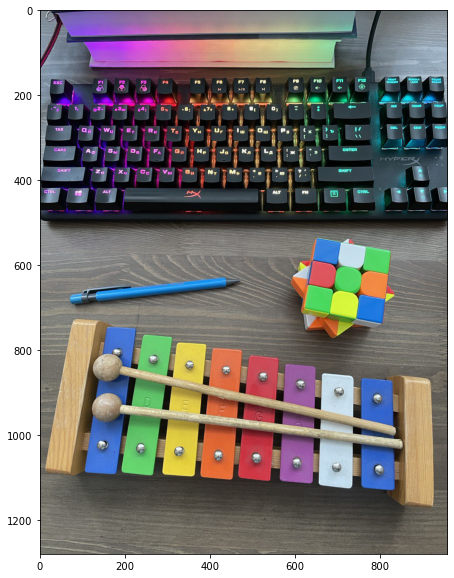

In [2]:
# Load image
img = cv2.imread('../data/source5.jpg')
# Convert it to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Plot it
plt.imshow(img)

Let's start with gray tones first.

In [3]:
# Black, dark gray, light gray, white
colors = np.array([[0, 0, 0],
                   [64, 64, 64],
                   [192, 192, 192],
                   [255, 255, 255]])

Using the colour pallette, let's quantize the original image.

In [4]:
# Cast the image to float
img = img.astype(np.float32)

# Prepare for quantization
rows, cols, channels = img.shape
quantized = np.zeros_like(img)

# Apply quantization
for r in tqdm(range(rows)):
    for c in range(cols):
        # Extract the original pixel value
        pixel = img[r, c]
        
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        new_pixel = colors[np.argmin([np.linalg.norm(pixel-color) for color in colors])]
        
        # Apply quantization
        quantized[r, c, :] = new_pixel

100%|██████████| 1280/1280 [00:43<00:00, 29.22it/s]


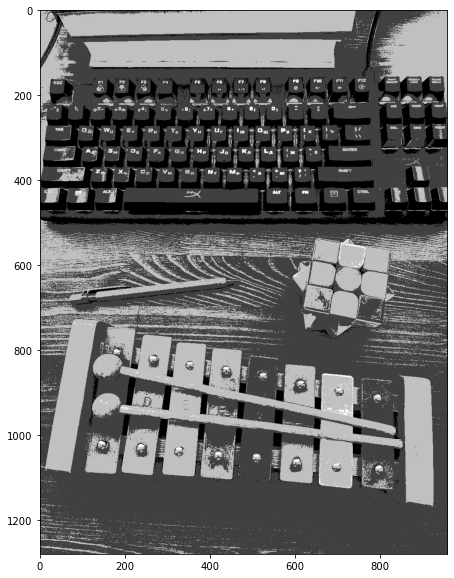

In [5]:
# Show quantized image (don't forget to cast back to uint8)
quantized = quantized.astype(np.uint8)
plt.imshow(quantized)

In [6]:
# Compute average quantization error
img_reshaped = img.reshape(-1, 3)
qnt_reshaped = quantized.reshape(-1, 3)
avg_quant_error = np.average((img_reshaped - qnt_reshaped)**2) ** 0.5
avg_quant_error

45.149069498301955

# Floyd-Steinberg Dithering
We are now going to implement the FS dithering and compare it to the optimally quantized image we have calculated above.

In [7]:
# Make a temporal copy of the original image, we will need it for error diffusion
img_tmp = np.copy(img)
dithering = np.zeros_like(img)

for r in tqdm(range(1, rows-1)):
    for c in range(1, cols-1):
        # Extract the original pixel value
        pixel = img_tmp[r, c]
        
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        new_pixel = colors[np.argmin([np.linalg.norm(pixel-color) for color in colors])]
        
        # Compute quantization error
        quant_error = pixel - new_pixel
        
        # Diffuse the quantization error accroding to the FS diffusion matrix
        # Note: You may need more than one line of code here
        img_tmp[r + 1][c    ] += quant_error * 7 / 16
        img_tmp[r - 1][c + 1] += quant_error * 3 / 16
        img_tmp[r    ][c + 1] += quant_error * 5 / 16
        img_tmp[r + 1][c + 1] += quant_error * 1 / 16
        
        # Apply dithering
        dithering[r, c, :] = new_pixel

100%|██████████| 1278/1278 [01:02<00:00, 20.31it/s]


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x1be1a1495e0>)

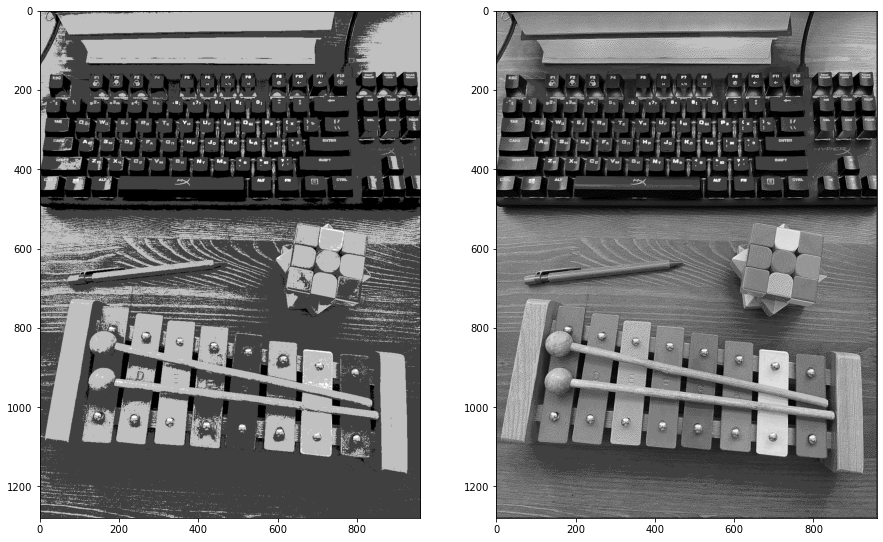

In [8]:
# Show quantized image (don't forget to cast back to uint8)
dithering = dithering.astype(np.uint8)
plt.subplot(121), plt.imshow(quantized)   # optimally quantized
plt.subplot(122), plt.imshow(dithering)   # dithering

In [9]:
# Compute average quantization error for dithered image
dth_reshaped = dithering.reshape(-1, 3)
avg_dith_error = np.average((img_reshaped - dth_reshaped)**2) ** 0.5
avg_dith_error

53.584504031162076

# Questions
 * Which image has higher quantization error? Optimally quantized or dithered?
 
dithered, это очевидно, потому что реализация алгоритма подразумевает, что мы специально своими руками увеличиваем шум (следовательно и ошибку)
 
* Which image looks better to you?

dithered image выглядит заметно лучше, как раз этого мы и добивались алгоритмом FSD :)

* Can you repeat the same process using only two colours: black and white? Show me :-)

In [10]:
# Black, dark gray, light gray, white
colors2 = np.array([[0, 0, 0],
                   [255, 255, 255]])

quantized2 = np.zeros_like(img)

# Apply quantization
for r in tqdm(range(rows)):
    for c in range(cols):
        # Extract the original pixel value
        pixel = img[r, c]
        
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        new_pixel = colors2[np.argmin([np.linalg.norm(pixel-color) for color in colors2])]
        
        # Apply quantization
        quantized2[r, c, :] = new_pixel

100%|██████████| 1280/1280 [00:23<00:00, 53.95it/s]


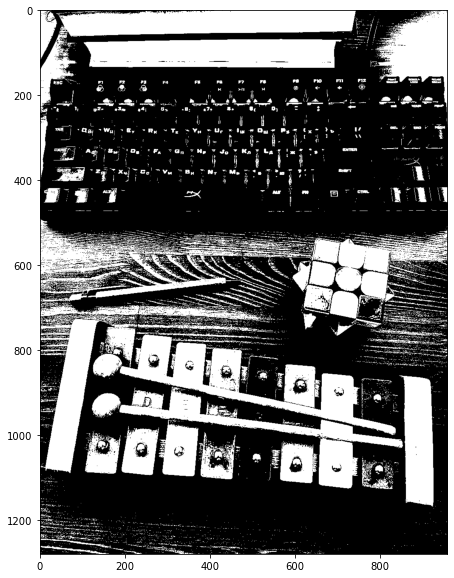

In [11]:
# Show quantized image (don't forget to cast back to uint8)
quantized2 = quantized2.astype(np.uint8)
plt.imshow(quantized2)

In [12]:
# Compute average quantization error
img_reshaped = img.reshape(-1, 3)
qnt_reshaped2 = quantized2.reshape(-1, 3)
avg_quant_error = np.average((img_reshaped - qnt_reshaped2)**2) ** 0.5
avg_quant_error

93.53882987996215

In [13]:
# Make a temporal copy of the original image, we will need it for error diffusion
img_tmp2 = np.copy(img)
dithering2 = np.zeros_like(img)

for r in tqdm(range(1, rows-1)):
    for c in range(1, cols-1):
        # Extract the original pixel value
        pixel = img_tmp2[r, c]
        
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        new_pixel = colors2[np.argmin([np.linalg.norm(pixel-color) for color in colors2])]
        
        # Compute quantization error
        quant_error = pixel - new_pixel
        
        # Diffuse the quantization error accroding to the FS diffusion matrix
        # Note: You may need more than one line of code here
        img_tmp2[r + 1][c    ] += quant_error * 7 / 16
        img_tmp2[r - 1][c + 1] += quant_error * 3 / 16
        img_tmp2[r    ][c + 1] += quant_error * 5 / 16
        img_tmp2[r + 1][c + 1] += quant_error * 1 / 16
        
        # Apply dithering
        dithering2[r, c, :] = new_pixel

100%|██████████| 1278/1278 [00:48<00:00, 26.33it/s]


In [14]:
# Compute average quantization error for dithered image
dth_reshaped2 = dithering2.reshape(-1, 3)
avg_dith_error = np.average((img_reshaped - dth_reshaped2)**2) ** 0.5
avg_dith_error

114.03193939912185

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x1be1adb0e80>)

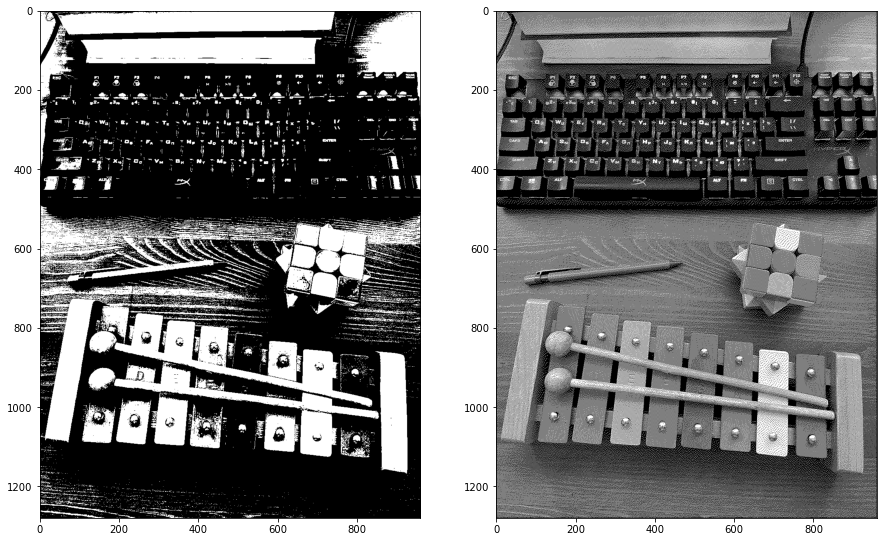

In [15]:
# Show quantized image (don't forget to cast back to uint8)
dithering2 = dithering2.astype(np.uint8)
plt.subplot(121), plt.imshow(quantized2)   # optimally quantized
plt.subplot(122), plt.imshow(dithering2)   # dithering

Я очень удивлен, что 2-x цветное изображение, обработанное FSD, получилось настолько читаемым и визуально приятным! Я даже 
долго думал, что это ошибка, выглядит как будто цветов больше, чем надо, но потом додумался сделать zoom-in :)

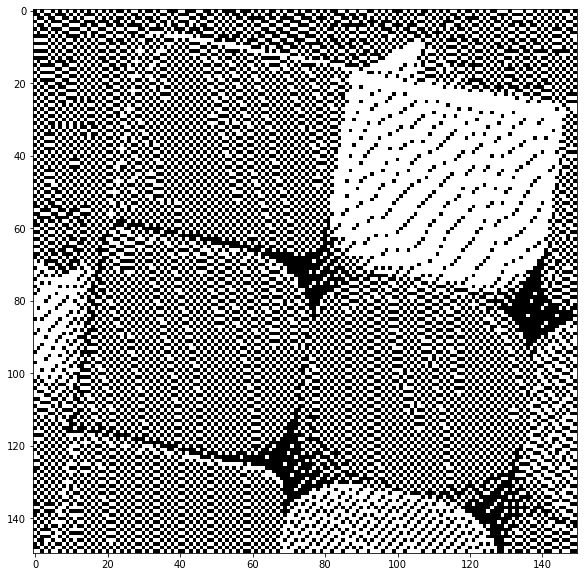

In [30]:
plt.imshow(dithering2[530:680, 620:770])

Впечатлен, крутая домашка, очень понравилась.